<a href="https://colab.research.google.com/github/Gabriellemga/Python_Cursos_Alura/blob/main/Data_viz_graficos_composicao_relacionamento/Desafio_graficos_composi%C3%A7%C3%A3o_relacionamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Paleta de cores

In [1]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'

## Aula 01 - Proporção dos dados

### Desafio 1

Como estão dispostos os valores agregados de serviços por região do Brasil no ano de 2018?

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/refs/heads/main/dados/pib_br_2002_2020_estados.csv')
df.head()

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293


In [ ]:
df_regiao_servicos = df.copy()
df_regiao_servicos = df_regiao_servicos.query("ano == 2018")[['regiao','va_servicos']]
df_regiao_servicos = df_regiao_servicos.groupby('regiao').sum().sort_values('va_servicos', ascending = False)
df_regiao_servicos

,va_servicos
regiao,
Sudeste,1933221862566
Sul,546627330178
Nordeste,433449662991
Centro-Oeste,296250896281
Norte,133394247965


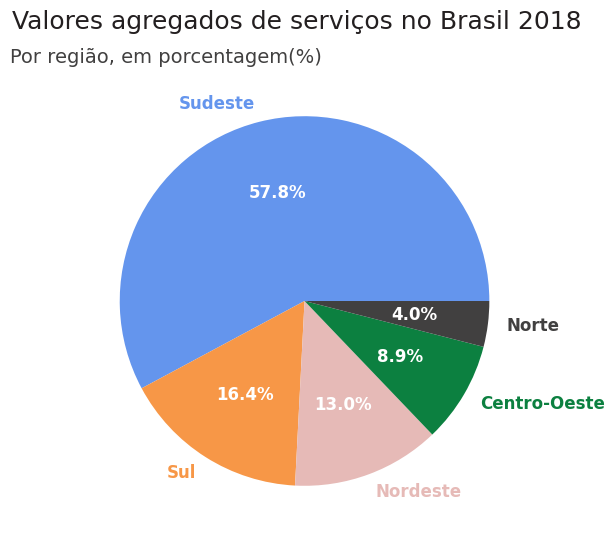

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (6,6))

cores = [AZUL3, LARANJA1, VERMELHO2 , VERDE1, CINZA2]

plt.suptitle('Valores agregados de serviços no Brasil 2018', fontsize = 18,
             color = CINZA1, ha = 'center')
plt.title('Por região, em porcentagem(%)', fontsize = 14, color = CINZA2, pad = 5, x = 0.20, y = 1 )

ptc, txt, _ = ax.pie(x = df_regiao_servicos['va_servicos'], labels = df_regiao_servicos.index, autopct = '%.1f%%',
                     pctdistance = 0.6, textprops = dict(size = 12, fontweight = 'bold', color = BRANCO), colors = cores)

for i, p in enumerate(ptc):
  txt[i].set_color(p.get_facecolor())

plt.show()


### Desafio 2

Qual a participação da Região Norte nos valores agregados da indústria de todo Brasil nos anos de 2010 e 2020? Podemos notar algum comportamento?

In [ ]:
df_industria = df.copy()
df_industria_2010 = df_industria.query("ano == 2010")[ ['regiao', 'va_industria']]
df_industria_2010.loc[df_industria_2010['regiao']== 'Norte', 'regiao'] = 'Norte'
df_industria_2010.loc[df_industria_2010['regiao']!= 'Norte', 'regiao'] = 'Outros'
df_industria_2010 = df_industria_2010.groupby('regiao').sum().sort_values('va_industria', ascending = False)


df_industria_2020 = df_industria.query("ano == 2020")[ ['regiao', 'va_industria']]
df_industria_2020.loc[df_industria_2020['regiao']== 'Norte', 'regiao'] = 'Norte'
df_industria_2020.loc[df_industria_2020['regiao']!= 'Norte', 'regiao'] = 'Outros'
df_industria_2020 = df_industria_2020.groupby('regiao').sum().sort_values('va_industria', ascending = False)

display(df_industria_2010, df_industria_2020)

,va_industria
regiao,
Outros,845492561850
Norte,58665438171


,va_industria
regiao,
Outros,1346596521109
Norte,137740478879


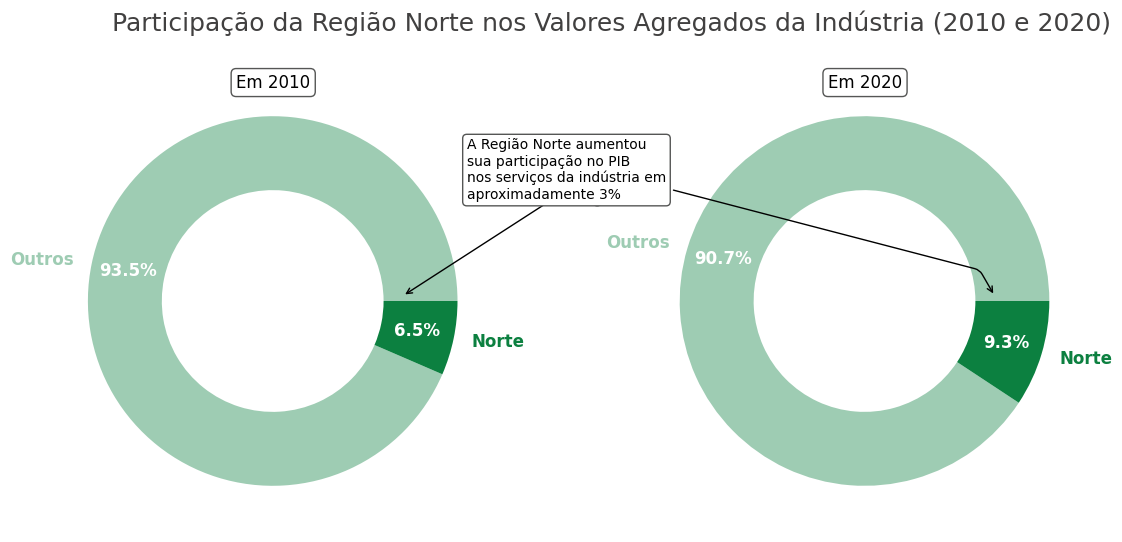

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize = (14,6))

plt.suptitle('Participação da Região Norte nos Valores Agregados da Indústria (2010 e 2020)', fontsize =18, color = CINZA2, ha = 'right',
             x = 0.9)

ptc_2010, txt_2010, _ = axs[0].pie(df_industria_2010['va_industria'], labels = df_industria_2010.index, autopct = '%.1f%%', pctdistance = 0.8,
                         wedgeprops=dict(width=0.4), textprops = dict(size = 12, fontweight = 'bold', color = BRANCO), colors = [VERDE3,VERDE1])

axs[0].annotate('Em 2010', xy = (140,320), size = 12, xycoords = 'axes points', bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3))

for i, p in enumerate(ptc_2010):
  txt_2010[i].set_color(p.get_facecolor())


ptc_2020, txt_2020, _ = axs[1].pie(df_industria_2020['va_industria'], labels = df_industria_2020.index, autopct = '%.1f%%', pctdistance = 0.8,
                         wedgeprops=dict(width=0.4), textprops = dict(size = 12, fontweight = 'bold', color = BRANCO), colors = [VERDE3,VERDE1])

for i, p in enumerate(ptc_2020):
  txt_2020[i].set_color(p.get_facecolor())


axs[1].annotate('Em 2020', xy = (140,320), size = 12, xycoords = 'axes points', bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3))



axs[0].annotate('\n\n\n', xy=(260, 170), xycoords='axes points', xytext=(400, 240), textcoords='axes points',
                bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3), size=10, arrowprops=dict(arrowstyle="->",
                          fc=CINZA1))

axs[1].annotate('A Região Norte aumentou\nsua participação no PIB\nnos serviços da indústria em\naproximadamente 3%',
                xy=(260, 170), xycoords='axes points', xytext=(-120, 240), textcoords='axes points',
                bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3), size=10, arrowprops=dict(arrowstyle="->", fc=CINZA1,
                connectionstyle='arc,angleA=0,angleB=-60,armA=30,armB=-30,rad=5' ))

plt.show()



# Aula 02 - Compondo dados estaticos

## Desafio 1

Como está composto o PIB do Estado de São Paulo em 2020 partindo do valor agregado bruto dos bens e serviços produzidos e os impostos líquidos?

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/refs/heads/main/dados/pib_br_2002_2020_estados.csv')
df.head()

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293


In [ ]:
pib_sp = df.copy()
pib_sp = pib_sp.query("ano == 2020 and  sigla_uf == 'SP'")[['va', 'impostos_liquidos', 'pib']]
pib_sp.rename(columns = {"pib":"PIB", "impostos_liquidos": "Impostos Líquidos", "va":"Valor Adicionado Bruto"}, inplace=True)
pib_sp = pib_sp.melt( var_name = 'Indicadores', value_name = 'Valores')
pib_sp

,Indicadores,Valores
0,Valor Adicionado Bruto,2014850308310
1,Impostos Líquidos,362788671543
2,PIB,2377638979835


In [ ]:
pib_sp['Valores_(em texto)'] = (pib_sp['Valores']/1e9).map('R$ {:,.3f} Bi'.format)
pib_sp["Medidas"] = ["absolute", "relative", "total"]
pib_sp

,Indicadores,Valores,Valores_(em texto),Medidas
0,Valor Adicionado Bruto,2014850308310,"R$ 2,014.850 Bi",absolute
1,Impostos Líquidos,362788671543,R$ 362.789 Bi,relative
2,PIB,2377638979835,"R$ 2,377.639 Bi",total


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(name = '', measure = pib_sp['Medidas'], x = pib_sp['Indicadores'],
                             y = pib_sp['Valores'], text = pib_sp['Valores_(em texto)'], textposition = 'outside',
                            connector_line = dict(color = CINZA3), increasing_marker = dict(color = VERDE1)))

fig.update_layout(width=1000, height=500, font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                  title_text='Distribuição do Produto Interno Bruto (PIB) de São Paulo em 2020' +
                             '<br><sup size=1 style="color:#555655">Impostos líquidos e Valores ' +
                              'Adicionados Brutos de bens e serviços (em bilhões de reais)</sup>',
                  title_pad_l = 50, plot_bgcolor= BRANCO, yaxis_range=[0,2900e9], hovermode="closest")

fig.update_yaxes(showticklabels=False)

fig.update_traces(hovertemplate = "<b>%{x}</b> = %{text}")


fig.add_annotation(text='Fonte dos dados: <a href="https://sidra.ibge.gov.br/pesquisa/pib-munic/tabelas">Produto Interno Bruto | IBGE</a>',
                   align="left", xref="paper", yref = "paper", x=1, y=-0.2, showarrow=False)

fig.show()

## Desafio 2

Qual a evolução anual do valor agregado de serviços na Região Nordeste entre os anos de 2016 a 2020?

In [ ]:
nordeste = df.copy()
anos = [x for x in range(2016,2021)]
nordeste = nordeste.query("regiao == 'Nordeste' and ano == @anos")[["ano", "va_servicos"]]
nordeste = nordeste.groupby('ano').sum().reset_index()
nordeste

,ano,va_servicos
0,2016,391149062027
1,2017,413890511671
2,2018,433449662991
3,2019,450661680677
4,2020,436102799877


In [ ]:
nordeste['variacao_servicos'] = nordeste['va_servicos'].diff().fillna(nordeste['va_servicos']).astype('int64')
nordeste['Medidas'] = ['absolute'] + ['relative'] * 4
atualizacao = pd.DataFrame({'ano': ['Total'],
                         'va_servicos': [nordeste["va_servicos"].values[-1]],
                         'variacao_servicos': [nordeste["va_servicos"].values[-1]],
                         'Medidas': ["total"]})

nordeste = pd.concat([nordeste, atualizacao], axis = 0, ignore_index = True)
nordeste = nordeste.drop(columns  = ['va_servicos'])
nordeste['Variação servicos(em texto)'] = (nordeste['variacao_servicos']/1e9).map('R$ {:,.2f} Bi'.format)
nordeste

,ano,variacao_servicos,Medidas,Variação servicos(em texto)
0,2016,391149062027,absolute,R$ 391.15 Bi
1,2017,22741449644,relative,R$ 22.74 Bi
2,2018,19559151320,relative,R$ 19.56 Bi
3,2019,17212017686,relative,R$ 17.21 Bi
4,2020,-14558880800,relative,R$ -14.56 Bi
5,Total,436102799877,total,R$ 436.10 Bi


In [ ]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(go.Waterfall(name = '', measure = nordeste['Medidas'], y = nordeste['variacao_servicos'],
                             text = nordeste['Variação servicos(em texto)'], textposition = 'outside',
                             connector_line = dict(color = CINZA1), totals_marker = dict(color = AZUL3),
                             increasing_marker = dict(color = VERDE1),
                             decreasing_marker = dict(color = VERMELHO1) ))

fig.update_layout(width=1300, height=600, font_family = 'DejaVu Sans', font_size=14,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                  title_text='Variação do Valor Agregado dos Serviços da Região Nordeste' +
                             '<br><sup size=1 style="color:#555655">De 2016 a 2020 (em bilhões de reais)</sup>',
                  plot_bgcolor= BRANCO, yaxis_range=[0,500e9])

fig.update_yaxes(showticklabels=False)

fig.update_xaxes(tickmode='array', tickvals=np.arange(0,6), ticktext=nordeste["ano"])

fig.update_traces(hovertemplate = "<b>%{x}</b> = %{text}")

fig.add_annotation(text="O <b>Ano de 2020</b> apresentou recuo <br> no valor agregado dos serviços.",
                   align="left", axref = 'x', ayref='y', x=4, y= 410e9, ax=4, ay=300e9,
                   arrowhead=1, arrowside = "start", showarrow=True, arrowwidth=2, arrowcolor=CINZA3,
                   bordercolor= CINZA3, borderwidth=1, borderpad=4)


fig.show()

# Aula 03 - Compondo dados dinâmicos

## Desafio 1:

Como está composto, em valores absolutos, o PIB por região dos 4 últimos anos do conjunto de dados (2017 a 2020)?

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/refs/heads/main/dados/pib_br_2002_2020_estados.csv')
df.head()

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293


In [ ]:
df_pib_regiao = df.copy()
anos = [x for x in range(2017, 2021)]
df_pib_regiao = df_pib_regiao.query("ano == @anos")[[ 'ano', 'regiao', 'pib']]
df_pib_regiao['pib'] = (df_pib_regiao['pib']/1e12).round(2)
df_pib_regiao = pd.crosstab(index = df_pib_regiao['ano'],  columns = df_pib_regiao['regiao'],
                            values = df_pib_regiao['pib'],aggfunc= 'sum')
df_pib_regiao = df_pib_regiao[["Sudeste", "Sul", "Nordeste", "Centro-Oeste", "Norte"]]
df_pib_regiao = df_pib_regiao.reset_index()

df_pib_regiao

regiao,ano,Sudeste,Sul,Nordeste,Centro-Oeste,Norte
0,2017,3.48,1.12,0.95,0.66,0.36
1,2018,3.72,1.20,1.01,0.70,0.39
2,2019,3.92,1.27,1.04,0.73,0.43
3,2020,3.95,1.31,1.09,0.79,0.49


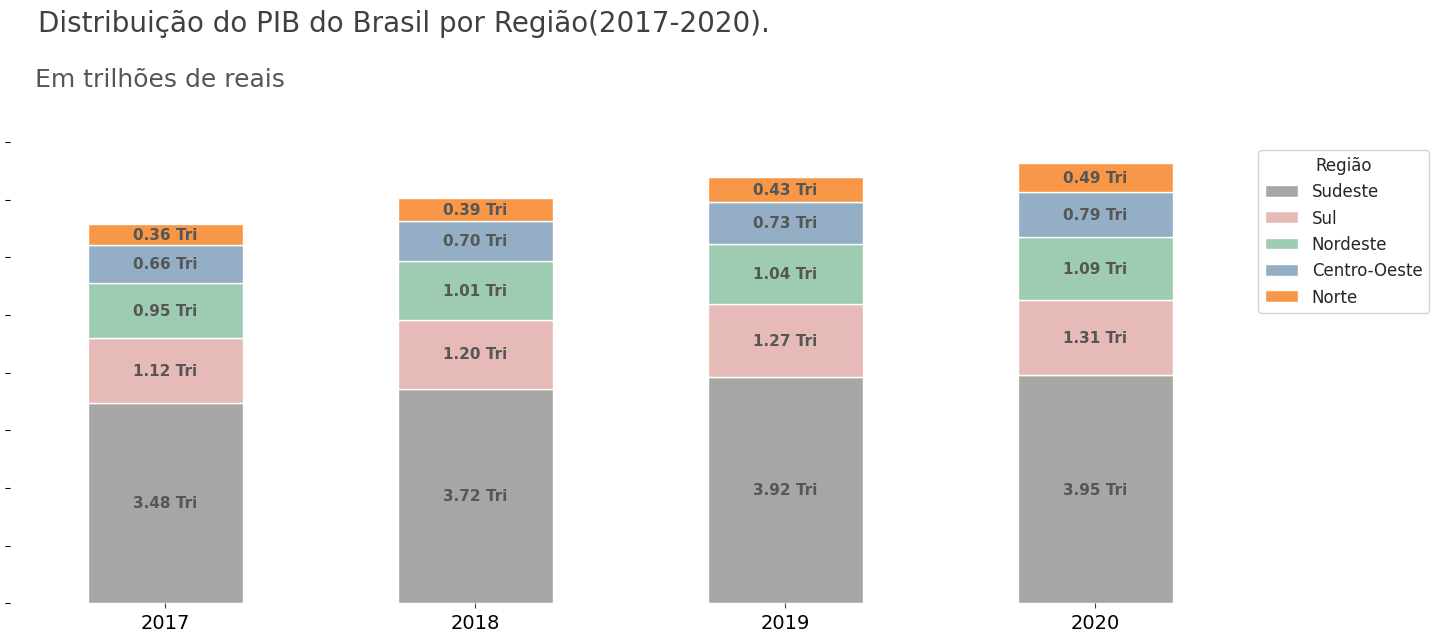

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (16,6))
sns.set_theme(style = 'white')

cores = [CINZA4, VERMELHO2, VERDE3, AZUL5, LARANJA1]

fig.suptitle('Distribuição do PIB do Brasil por Região(2017-2020).', fontsize = 20, color = CINZA2,
             ha = 'right',  x = 0.60, y = 1.10)

df_pib_regiao.plot(x = 'ano', kind = 'bar', stacked = True, color = cores, ax = ax)

ax.set_title('Em trilhões de reais', color = CINZA3, fontsize = 18, loc = 'left', x = 0.02, y = 1.1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=14, color = CINZA2, labelrotation = 0)
ax.set_frame_on(False)

ax.legend(bbox_to_anchor = (1,1), title = 'Região', title_fontsize = 12, fontsize = 12 )

for container in ax.containers:
    labels = [f'{valor.get_height():.2f} Tri' for valor in container]
    ax.bar_label(container, label_type='center', labels = labels, size = 11, color = CINZA3, fontweight = "bold")


plt.show()

## Desafio 2:

Como está composto os valores agregados brutos dos bens e serviços (em valor absoluto) em relação aos Estados da região Centro-Oeste no ano de 2020?

In [ ]:
df_co = df.copy()
df_co = df_co.query("regiao == 'Centro-Oeste' and ano == 2020")[ ['sigla_uf','va_servicos', 'va_industria', 'va_adespss', 'va_agropecuaria']]
df_co = df_co.sort_values('va_servicos', ascending = True)
df_co = df_co.set_index('sigla_uf')
df_co

,va_servicos,va_industria,va_adespss,va_agropecuaria
sigla_uf,,,,
MS,40463334838,23313710730,20075400418,26045011196
MT,62253821963,27663774472,23686938663,46004316712
GO,89797907217,47124851599,33887411346,29022562983
DF,116547655370,10942472569,111267001381,1623976909


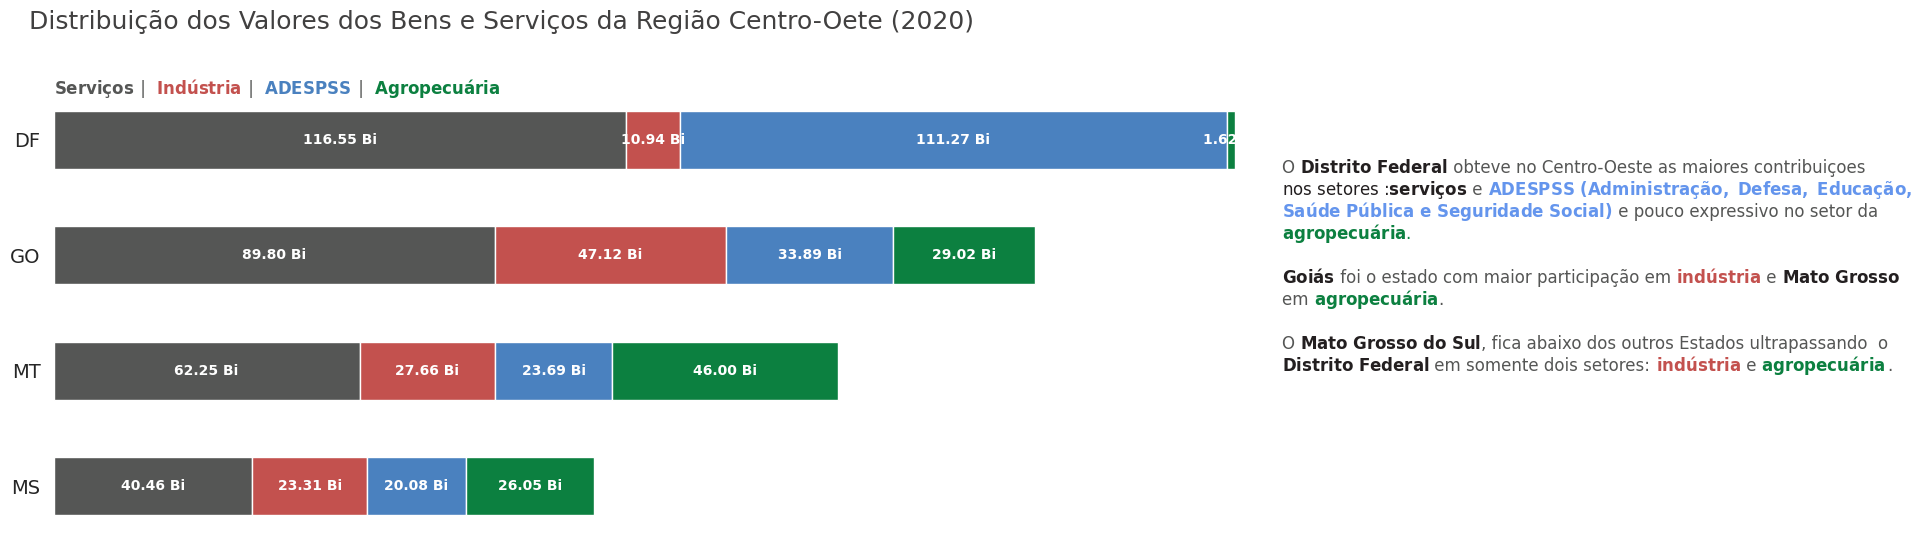

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (16,6))
sns.set_theme(style = 'white')

fig.suptitle('Distribuição dos Valores dos Bens e Serviços da Região Centro-Oete (2020)',
             fontsize = 18, color = CINZA2, ha = 'right',x = 0.7,  y = 1)

cores = [CINZA3, VERMELHO1, AZUL2, VERDE1]
df_co.plot( kind = 'barh', stacked = True, color = cores, ax = ax)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=14, color = CINZA2)
ax.set_frame_on(False)


for container in ax.containers:
      labels = [f'{valor.get_width()/1e9:.2f} Bi' for valor in container]
      ax.bar_label(container, label_type='center', labels = labels, size = 10, color = BRANCO, fontweight='bold')

from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

ax.legend().remove()
texto_colorido(0, 3.4, '$\\bf{Serviços}$ || | || $\\bf{Indústria}$ || | || $\\bf{ADESPSS}$ || | || $\\bf{Agropecuária}$',
               cores = [[cores[0], CINZA3, cores[1], CINZA3, cores[2], CINZA3, cores[3]]], ax=ax, fontsize=12)

texto_colorido(
    250e9, 1,
    'O ||$\\bf{Distrito\ Federal}$|| obteve no Centro-Oeste as maiores contribuiçoes\n'
    'nos setores :$\\bf{serviços}$|| e ||$\\bf{ADESPSS\ (Administração,\ Defesa,\ Educação,}$\n'
    '$\\bf{Saúde\ Pública\ e\ Seguridade\ Social)}$|| e pouco expressivo no setor da\n'
    '$\\bf{agropecuária}$.\n'
    '\n'
    '$\\bf{Goiás}$|| foi o estado com maior participação em ||$\\bf{indústria}$|| e ||$\\bf{Mato\ Grosso}$\n'
    'em ||$\\bf{agropecuária}$||.\n'
    '\n'
    'O ||$\\bf{Mato\ Grosso\ do\ Sul}$||, fica abaixo dos outros Estados ultrapassando  o\n'
    '$\\bf{Distrito\ Federal}$|| em somente dois setores: ||$\\bf{indústria}$|| e ||$\\bf{agropecuária}$ ||.',
    [[CINZA3, CINZA1, CINZA3],                     # linha 1                          # cores
     [CINZA1,CINZA3, AZUL3, CINZA3],                      # linha 2
     [AZUL3, CINZA3],
     [VERDE1, CINZA3],
     [CINZA3],                                     # linha 4
     [CINZA1, CINZA3, VERMELHO1, CINZA3, CINZA1],   # linha 5
     [CINZA3, VERDE1, CINZA3],                     # linha 6
     [CINZA3],                                     # linha 7
     [CINZA3, CINZA1, CINZA3],     # linha 8
     [CINZA1, CINZA3, VERMELHO1, CINZA3, VERDE1, CINZA3],   # linha 9
    ],
    esp=22,
    ax=ax,
    fontsize=12)



plt.show()

# Aula 04 - Investigando a variação de dados

## Desafio 1

No setor de Administração, Defesa, Educação, Saúde Pública e Seguridade Social (ADESPSS), como estão distribuídos os valores adicionados por região, em valores relativos, dentro do período da base dos dados (2002 - 2020)?

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/refs/heads/main/dados/pib_br_2002_2020_estados.csv')

df_adespss = df.copy()
df_adespss = df_adespss[[ 'ano','regiao', 'va_adespss']]
df_adespss = pd.crosstab(index = df_adespss['ano'], columns = df_adespss['regiao'], values = df_adespss['va_adespss'], aggfunc = 'sum', normalize= 'index')
df_adespss = (df_adespss * 100).round(2)
df_adespss = df_adespss[["Sudeste", "Sul", "Nordeste", "Centro-Oeste", "Norte"]]
df_adespss

regiao,Sudeste,Sul,Nordeste,Centro-Oeste,Norte
ano,,,,,
2002,45.80,12.44,19.25,15.24,7.27
2003,45.17,13.08,19.17,15.23,7.34
2004,44.67,12.82,19.03,16.03,7.45
2005,44.41,12.83,19.51,15.72,7.52
2006,43.70,12.61,19.99,16.02,7.68
2007,44.23,12.62,19.86,15.65,7.64
2008,44.19,12.43,20.00,15.75,7.63
2009,43.84,12.07,20.45,15.94,7.70
2010,42.55,12.88,20.81,15.88,7.88


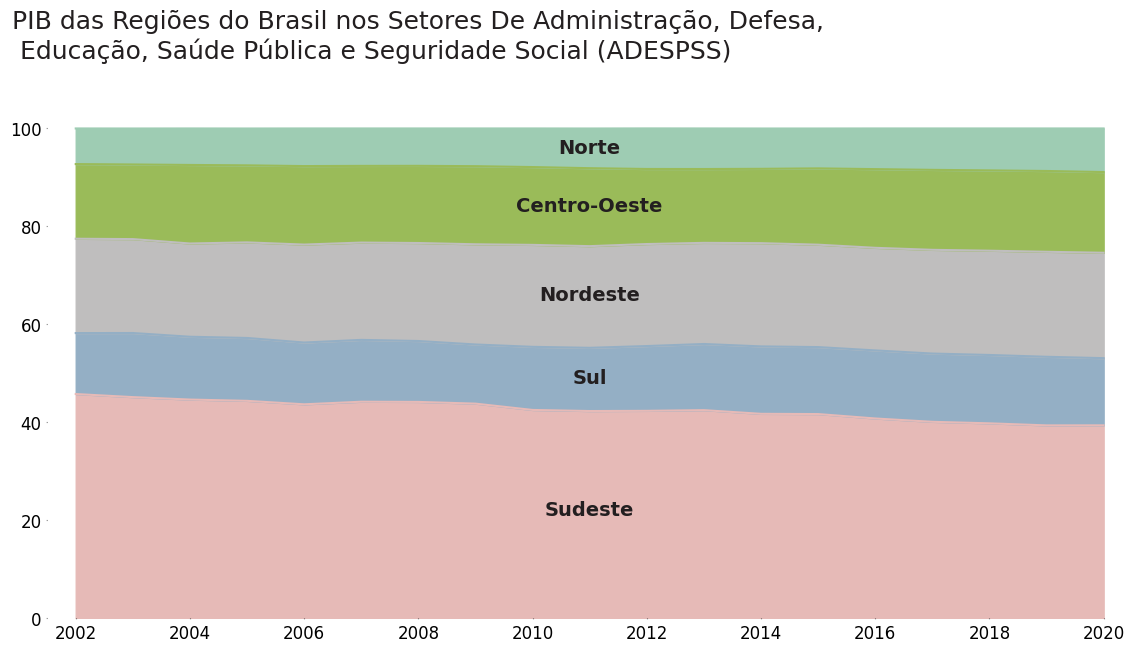

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,7))

cores = [ VERMELHO2, AZUL5, CINZA5, VERDE2, VERDE3]

df_adespss.plot(kind = 'area', stacked = True, color = cores, ax = ax, xticks = range(2002,2021,2))

plt.suptitle('PIB das Regiões do Brasil nos Setores De Administração, Defesa,\n Educação, Saúde Pública e Seguridade Social (ADESPSS)',
             fontsize = 18, color = CINZA1, ha='left', x = 0.1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=12, color = CINZA2)
ax.yaxis.set_tick_params(labelsize=12, color = CINZA2)
ax.tick_params(axis='both', which='both', length=0.5)
ax.set_frame_on(False)
ax.legend().remove()
plt.ylim(0, 110)
plt.xlim(2001.5, 2020.5)

regiao = df_adespss.columns
y_pos = [21, 48, 65, 83, 95]
for i in range(len(regiao)):
  ax.text(2011, y_pos[i], f'{regiao[i]}', color = CINZA1, weight = "bold", fontsize = 14, ha="center", transform=ax.transData)


plt.show()

## Desafio 2

Qual foi a variação do PIB relativo à indústria nas regiões do Brasil nos anos de 2010, 2015 e 2020?

In [ ]:
df_ind = df.copy()
df_ind = df_ind.query("ano == [2010, 2015, 2020]")[['ano', 'regiao', 'va_industria']]
df_ind = pd.crosstab(index = df_ind['ano'], columns = df_ind['regiao'], values = df_ind['va_industria'], aggfunc = 'sum', normalize = 'index')
df_ind = (df_ind * 100).round(2)
df_ind

regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
ano,,,,,
2010,6.06,11.60,6.49,58.79,17.07
2015,7.00,12.85,6.12,55.00,19.02
2020,7.35,12.21,9.28,52.00,19.17


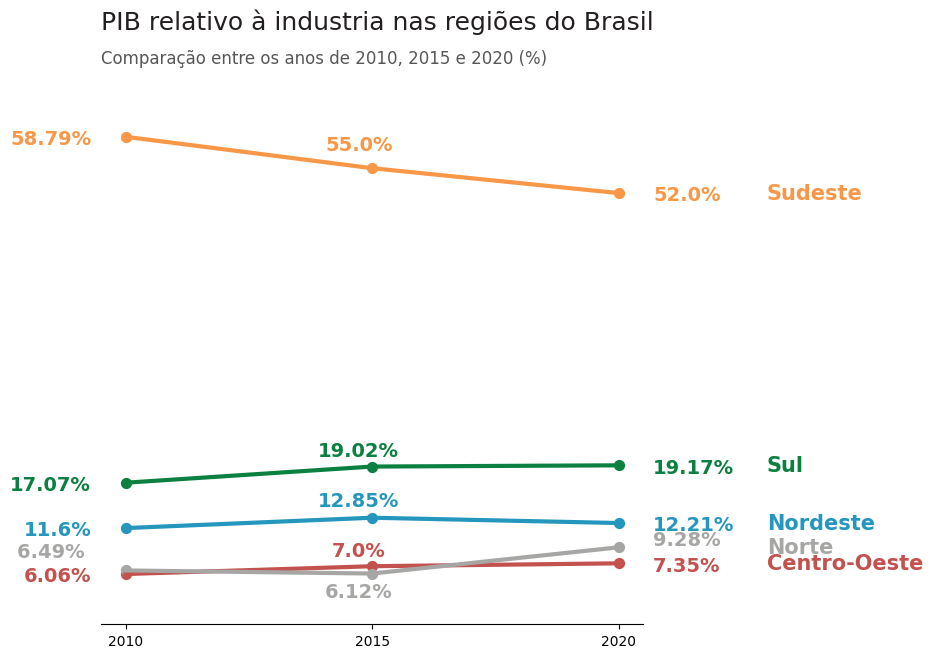

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize = (7,7))

cores = [ VERMELHO1, AZUL4, CINZA4, LARANJA1, VERDE1]

ax2 = ax1.twinx()
ax1.set_ylim([0, 65])
ax2.set_ylim([0,65])

for i in range(5):
  ax1.scatter(x = df_ind.index, y = df_ind.iloc[:, i], color = cores[i], s = 50)
  ax1.plot(df_ind.index, df_ind.iloc[:,i], color = cores[i], lw = 3)
  ax1.text(x = 2023, y = df_ind.iloc[-1,i], s = df_ind.columns[i],fontsize=15, fontweight = 'bold', linespacing=1.5, color=cores[i], va='center' )


ax1.set_title('PIB relativo à industria nas regiões do Brasil', fontsize = 18, color = CINZA1, loc='left', pad = 40)
ax1.text(0, 1.05, "Comparação entre os anos de 2010, 2015 e 2020 (%)", transform=ax1.transAxes, color= CINZA3, fontsize=12, ha='left', va='center')
ax1.tick_params(left = False)
ax2.tick_params(right = False)
ax1.spines[["top", "left", "right"]].set_visible(False)
ax2.set_frame_on(False)

plt.setp(ax1, xticks = [2010,2015, 2020], xticklabels = ['2010','2015', '2020'], yticks = df_ind.iloc[0,:],
         yticklabels = [f'{str(valor)}%'if i != 2 else f'{str(valor)}% \n\n' for i, valor in enumerate(df_ind.iloc[0,:])])

plt.setp(ax2, yticks = df_ind.iloc[2,:], yticklabels = [f'{str(valor)}%'if i != 2 else f'{str(valor)}% \n' for i, valor in enumerate(df_ind.iloc[2,:])])

valor = list(df_ind.loc[2015])
y_pos = [3, 9, -2, 52,15]
for i in range(len(valor)):
 ax1.text(2015,y_pos[i],f'{valor[i]}%', weight = "bold", fontsize = 14, color = cores[i], ha="center", transform=ax.transData)

for ax in (ax1, ax2):
  for i, item in enumerate(ax.get_yticklabels()):
    item.set_fontsize(14)
    item.set_fontweight('bold')
    item.set_color(cores[i])

plt.show()

## Aula 05- Relacionando dados

## Desafio 1

Qual a relação entre as notas das disciplinas de língua portuguesa e matemática do SAEB no Ensino Fundamental Anos Finais no período das 5 últimas avaliações?

In [2]:
import pandas as pd
ideb = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos-composicao-relacionamento/master/dados/ideb_reg_2005_2021.csv")

ideb.head(6)

,ano,regiao,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb
0,2005,Centro-Oeste,estadual,fundamental,EFAF,72.1,0.721828,233.50,227.88,4.356453,3.1
1,2005,Centro-Oeste,estadual,fundamental,EFAI,83.0,0.837081,185.38,172.13,4.631618,3.9
2,2005,Centro-Oeste,estadual,medio,EM,68.0,0.695138,261.23,251.52,4.123654,2.9
3,2005,Centro-Oeste,privada,fundamental,EFAF,94.4,0.943491,283.57,266.82,5.840183,5.5
4,2005,Centro-Oeste,privada,fundamental,EFAI,97.3,0.972388,223.64,210.36,6.057024,5.9
5,2005,Centro-Oeste,privada,medio,EM,92.4,0.943179,338.52,309.85,6.082840,5.7


In [22]:
anos = [ x for x in range(2013,2022)]
ideb_saeb = ideb.copy()
ideb_saeb = ideb_saeb.query(" anos_escolares== 'EFAF' and ano ==@anos")[['ano','nota_saeb_matematica', 'nota_saeb_lingua_portuguesa']]
ideb_saeb = ideb_saeb.reset_index(drop = True)
ideb_saeb.head()

,ano,nota_saeb_matematica,nota_saeb_lingua_portuguesa
0,2013,246.08,242.41
1,2013,291.98,280.08
2,2013,232.36,229.52
3,2013,283.20,273.80
4,2013,235.36,235.19


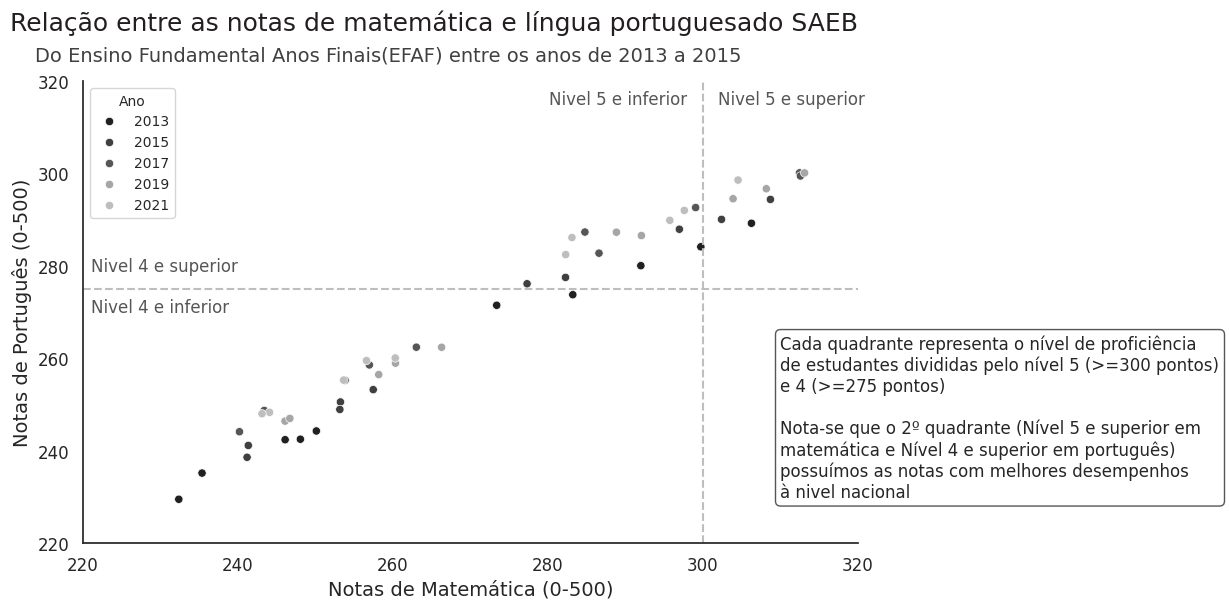

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

cores = [CINZA1,CINZA2,CINZA3,CINZA4,CINZA5]

fig, ax = plt.subplots(figsize = (10,6))
sns.set_theme(style = 'white')

ax = sns.scatterplot(data = ideb_saeb, x = 'nota_saeb_matematica', y = 'nota_saeb_lingua_portuguesa',hue = 'ano',
                     palette = cores)

plt.suptitle('Relação entre as notas de matemática e língua portuguesado SAEB', size = 18, color = CINZA1, ha = 'right', x = 0.9, y = 1)
plt.title('Do Ensino Fundamental Anos Finais(EFAF) entre os anos de 2013 a 2015', size = 14, color = CINZA2, pad = 15, ha = 'right', x = 0.85, y = 1)
ax.legend(bbox_to_anchor = (220,320), title = 'Ano', title_fontsize = 10, fontsize = 10, loc = 'upper left', bbox_transform=ax.transData)
ax.set_xlabel('Notas de Matemática (0-500)', fontsize = 14)
ax.set_ylabel('Notas de Português (0-500)', fontsize = 14)
ax.xaxis.set_tick_params(labelsize = 12, color = CINZA1)
ax.set_xlim(220,320)
ax.yaxis.set_tick_params(labelsize = 12, color = CINZA1)
ax.set_ylim(220,320)
sns.despine()

plt.axhline(y = 275, color = CINZA5, linestyle = '--')
ax.text(ax.get_xlim()[0] + 1, 278, 'Nivel 4 e superior', fontsize = 12, color = CINZA3, va = 'bottom' )
ax.text(ax.get_xlim()[0] + 1, 273, 'Nivel 4 e inferior', fontsize = 12, color = CINZA3, va = 'top' )

plt.axvline(x = 300, color = CINZA5, linestyle = '--' )
ax.text(302, ax.get_ylim()[1]-5, 'Nivel 5 e superior', fontsize = 12, color =CINZA3, ha = 'left')
ax.text(298, ax.get_ylim()[1]-5, 'Nivel 5 e inferior', fontsize = 12, color =CINZA3, ha = 'right')

ax.annotate("Cada quadrante representa o nível de proficiência\nde estudantes divididas pelo nível 5 (>=300 pontos)\ne 4 (>=275 pontos)\n\n"
            "Nota-se que o 2º quadrante (Nível 5 e superior em \nmatemática e Nível 4 e superior em português)\n"
            "possuímos as notas com melhores desempenhos \nà nivel nacional", xy=(310, 230), xycoords='data',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3),
            xytext=(0, 0), textcoords='offset points')

plt.show()

## Desafio 2

Qual seria a relação entre as notas do SAEB no Ensino Médio? Conseguimos notar como as duas se comportam em relação a taxa de aprovação e as regiões?

In [108]:
ideb_saeb_medio = ideb.query("anos_escolares == 'EM'")[[ 'ano','nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'taxa_aprovacao']]
ideb_saeb_medio = ideb_saeb_medio.reset_index(drop = True)
ideb_saeb_medio.head()

,ano,nota_saeb_matematica,nota_saeb_lingua_portuguesa,taxa_aprovacao
0,2005,261.23,251.52,68.0
1,2005,338.52,309.85,92.4
2,2005,247.52,237.10,68.2
3,2005,319.33,299.08,90.8
4,2005,243.61,236.07,68.8


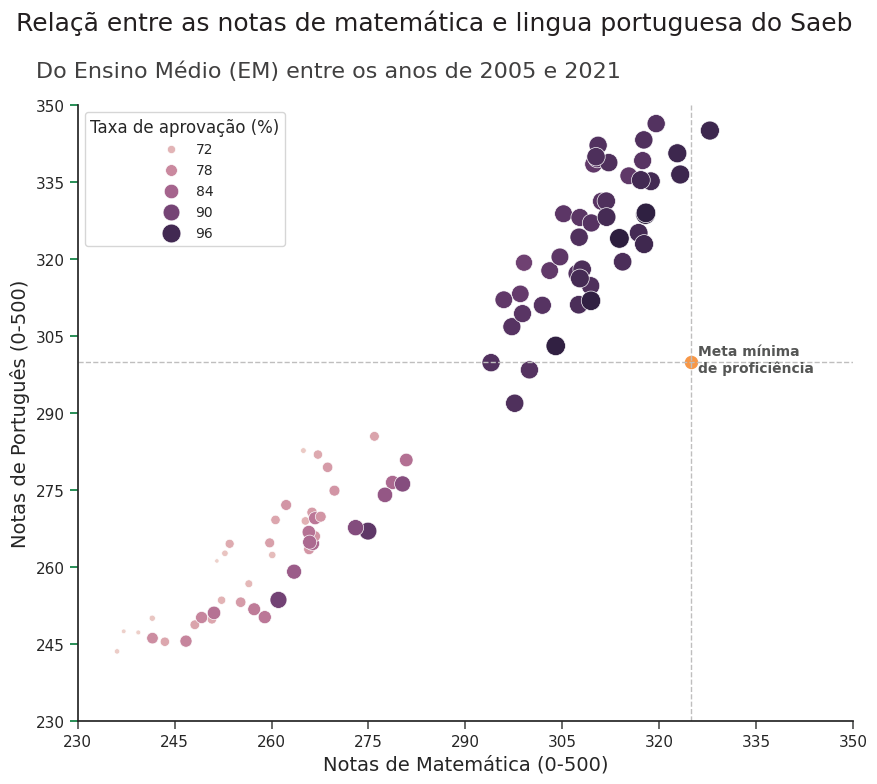

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(figsize = (10,8))

ax = sns.scatterplot(data = ideb_saeb_medio, x = 'nota_saeb_lingua_portuguesa', y = 'nota_saeb_matematica', hue = 'taxa_aprovacao',
                     size = 'taxa_aprovacao', sizes = (10,200), color = AZUL2)

plt.suptitle('Relaçã entre as notas de matemática e lingua portuguesa do Saeb', size = 18, color = CINZA1, ha = 'right', x = 0.9, y = 1)
plt.title('Do Ensino Médio (EM) entre os anos de 2005 e 2021', size = 16, color = CINZA2, ha = 'right', pad = 20, x =0.7, y = 1)
ax.set_xlabel('Notas de Matemática (0-500)', fontsize = 14)
ax.set_ylabel('Notas de Português (0-500)', fontsize = 14)
ax.legend(bbox_to_anchor = (230,350), title = 'Taxa de aprovação (%)', fontsize = 10, loc = 'upper left', bbox_transform = ax.transData )
ax.xaxis.set_tick_params(labelsize=11, color = CINZA3)
ax.yaxis.set_tick_params(labelsize=11, color = CINZA3)
ax.tick_params(bottom=True, left=True)
ax.set_xlim(230, 350)
ax.set_ylim(230, 350)
ax.spines[['top','right']].set_visible(False)


xticks = np.arange(230, 360, 15)
yticks = np.arange(230, 360, 15)
plt.setp(ax, xticks=xticks, yticks=yticks)


ax.scatter([325], [300], color=LARANJA1, s=75)
plt.axvline(x = 325, color = CINZA5, linestyle='--', linewidth=1)
plt.axhline(y = 300, color = CINZA5, linestyle='--', linewidth=1)
ax.text(326, 298, 'Meta mínima\nde proficiência', color=CINZA3, fontsize=10, fontweight='bold')


plt.show()